In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

!ls

drive  sample_data  spark-3.1.1-bin-hadoop3.2  spark-3.1.1-bin-hadoop3.2.tgz


In [4]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled", True) # Property used to format output tables better
spark

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Create a Spark DataFrame from a CSV file on Google Drive
df_pyspark = spark.read.csv('/content/drive/My Drive/telecom_churn.csv', header=True, inferSchema=True)

# Show the DataFrame
df_pyspark.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+-----

In [6]:
df_pyspark.count()

7043

In [7]:
type(df_pyspark)

pyspark.sql.dataframe.DataFrame

In [8]:
df_pyspark.columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [9]:
df_pyspark.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: string (nullable = true)
 |-- Churn: string (nullable = true)



In [10]:
df_pyspark.describe().show()

+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+------------------+------------------+-----+
|summary|customerID|gender|     SeniorCitizen|Partner|Dependents|            tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|    MonthlyCharges|      TotalCharges|Churn|
+-------+----------+------+------------------+-------+----------+------------------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+--------------------+------------------+------------------+-----+
|  count|      7043|  7043|              7043|   7043|      7043|     

In [11]:
from pyspark.sql.functions import col
string_columns = ['TotalCharges']
for col_name in string_columns:
    df = df_pyspark.withColumn(col_name, col(col_name).cast('double'))
df = df.withColumn('SeniorCitizen', df['SeniorCitizen'].cast('string'))

df.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: string (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: string (nullable = true)



In [12]:
# Get the data types of all columns
column_types = df.dtypes

# Separate numerical and categorical columns
numerical_columns = [col_name for col_name, col_type in column_types if col_type in ['bigint', 'int', 'float', 'double']]
categorical_columns = [col_name for col_name, col_type in column_types if col_type == 'string']

# Print the number of numerical and categorical columns
print(f"Number of numerical columns: {len(numerical_columns)}")
print(f"Number of categorical columns: {len(categorical_columns)}")

# Print the list of numerical and categorical columns
print(f"Numerical columns: {numerical_columns}")
print(f"Categorical columns: {categorical_columns}")



Number of numerical columns: 3
Number of categorical columns: 18
Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


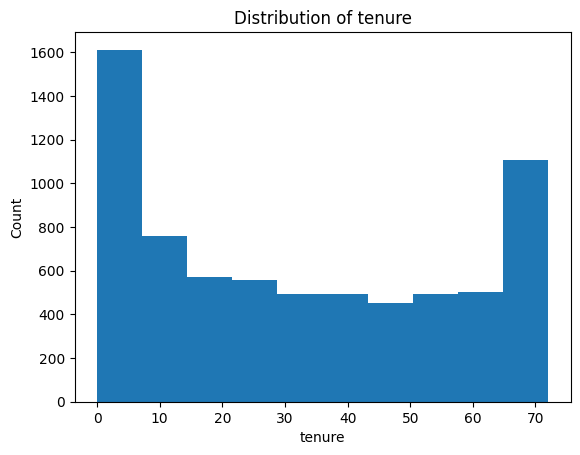

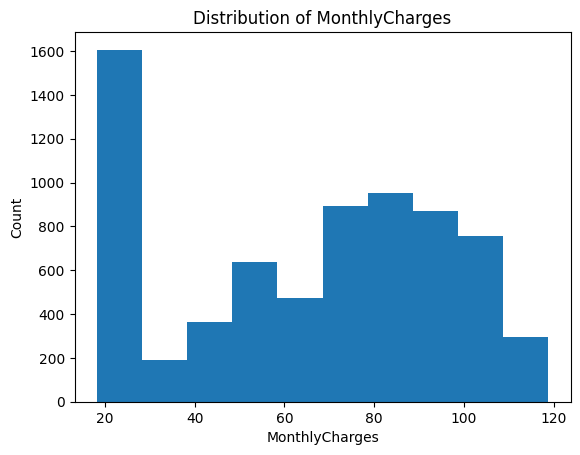

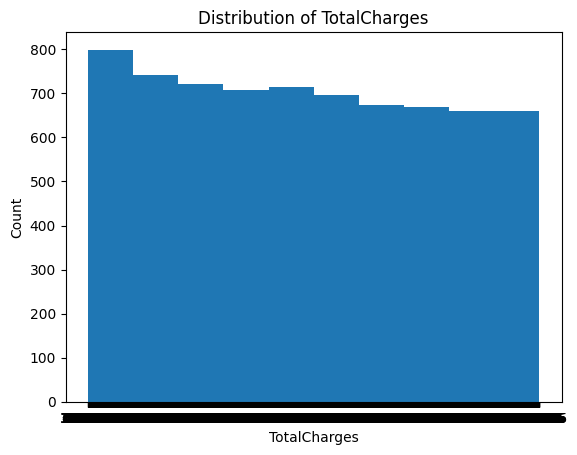

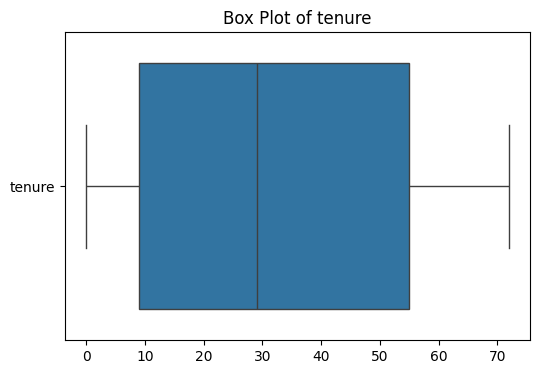

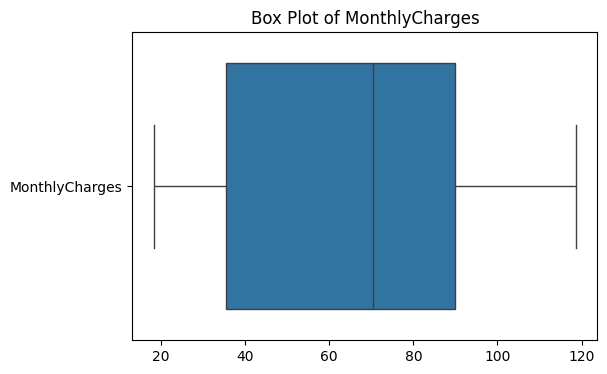

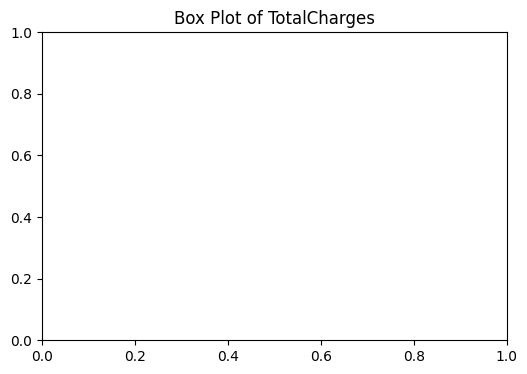

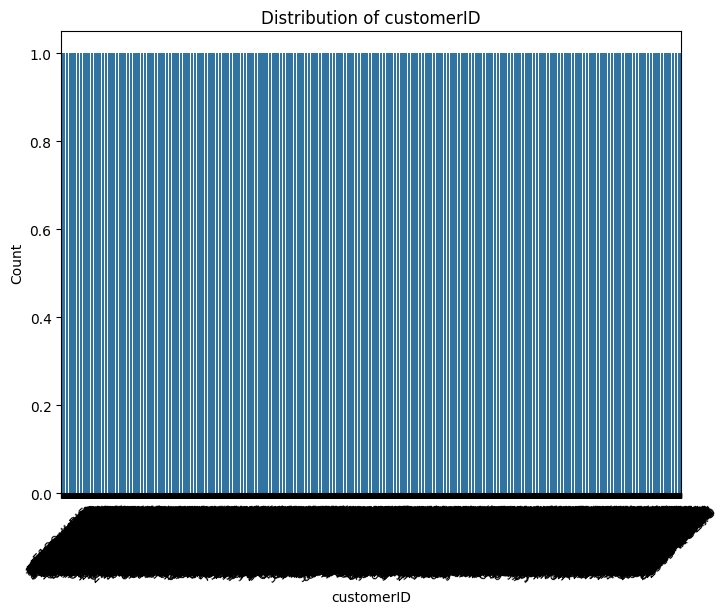

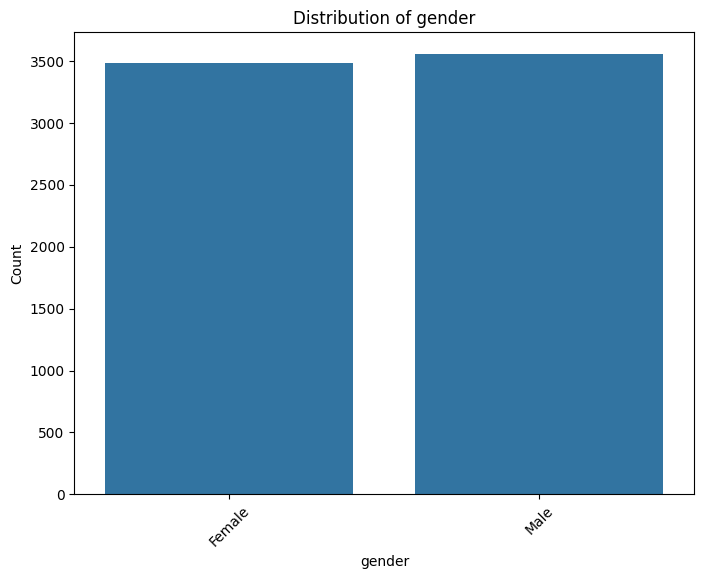

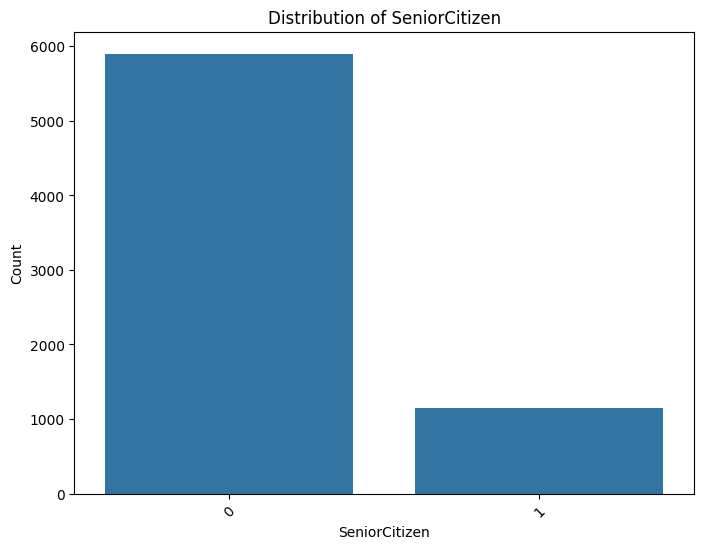

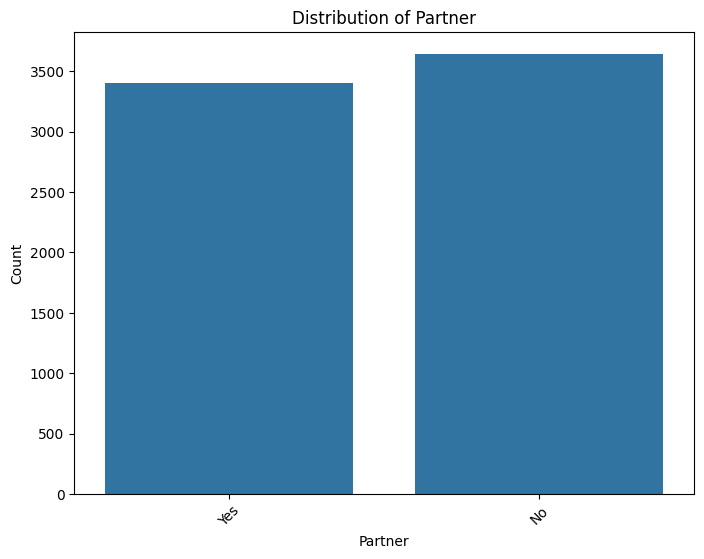

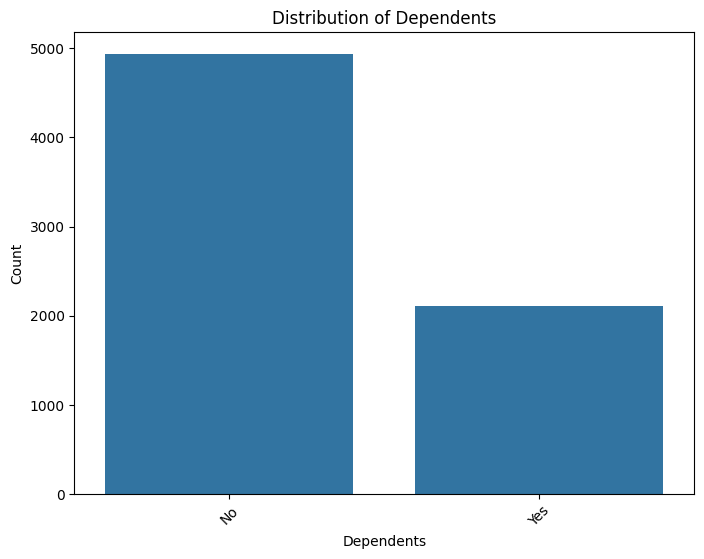

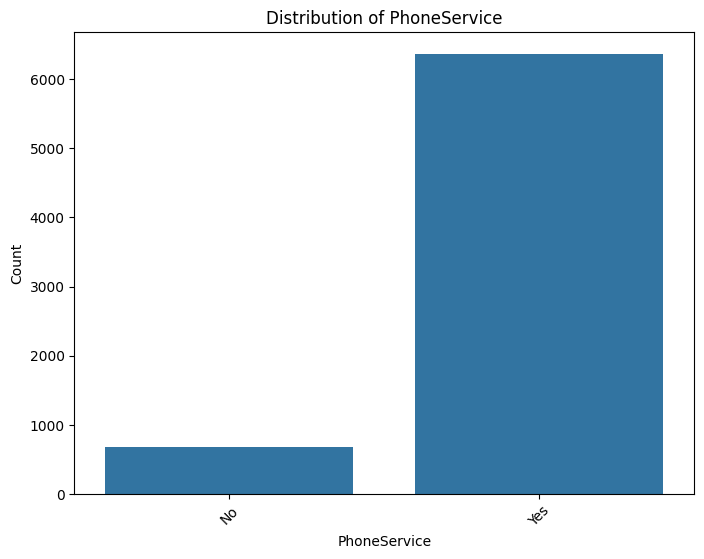

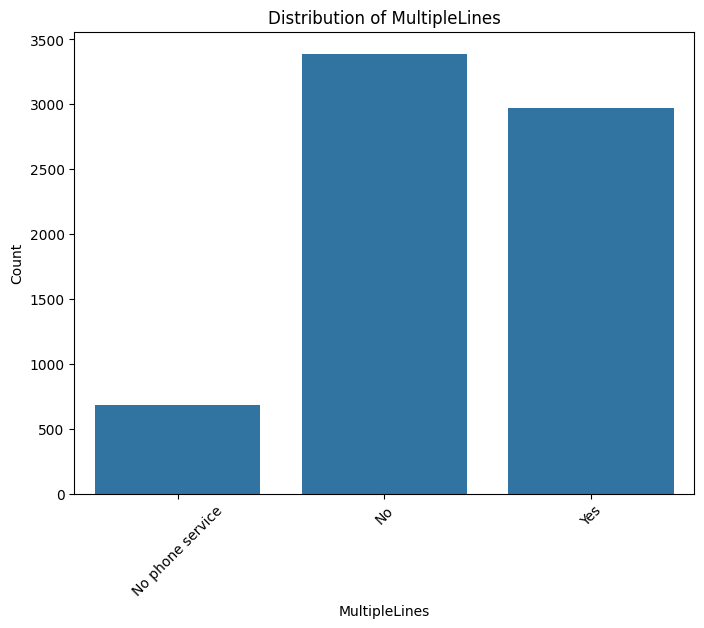

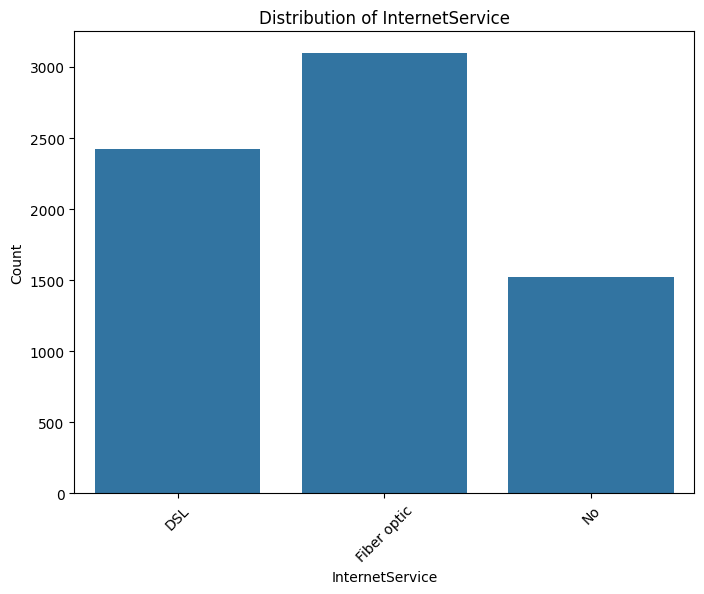

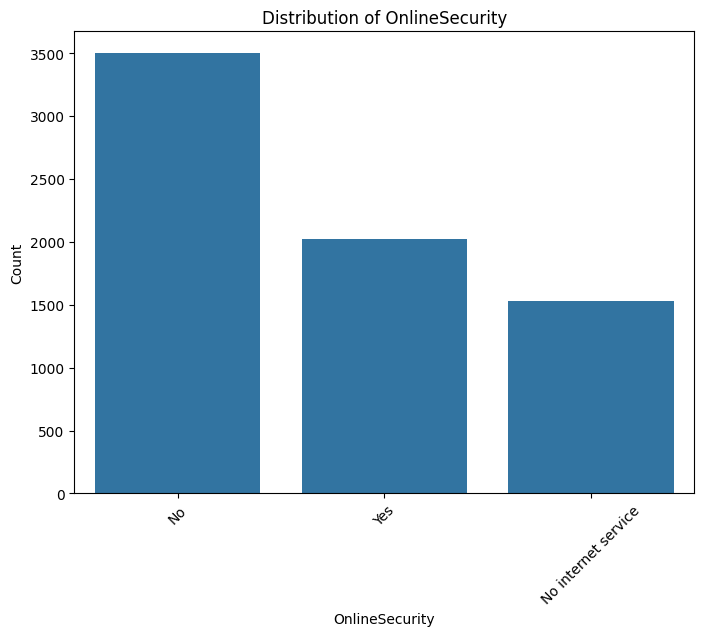

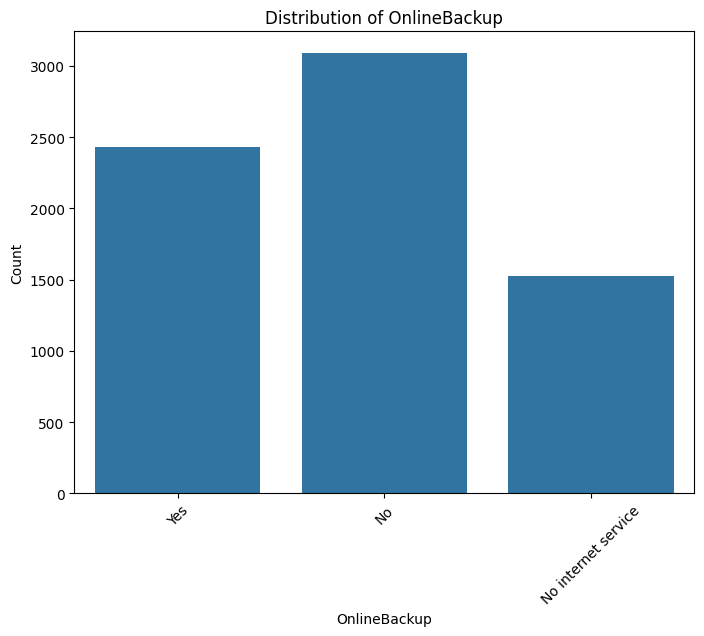

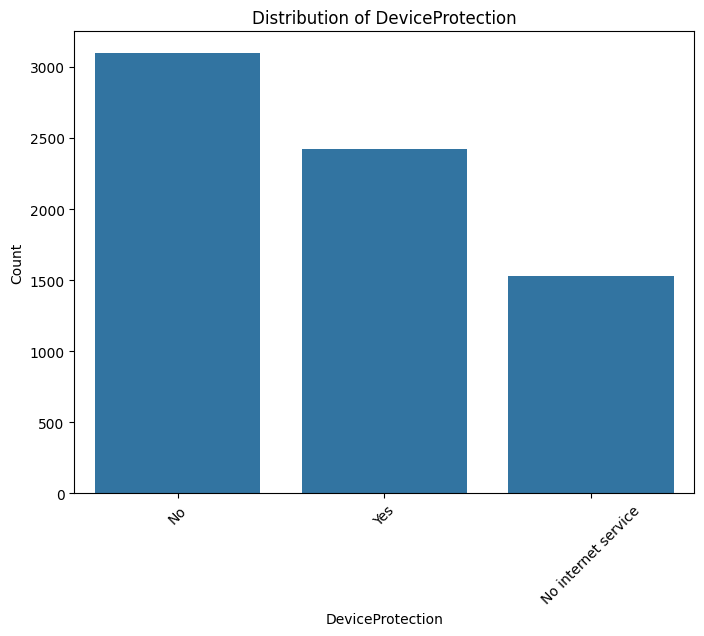

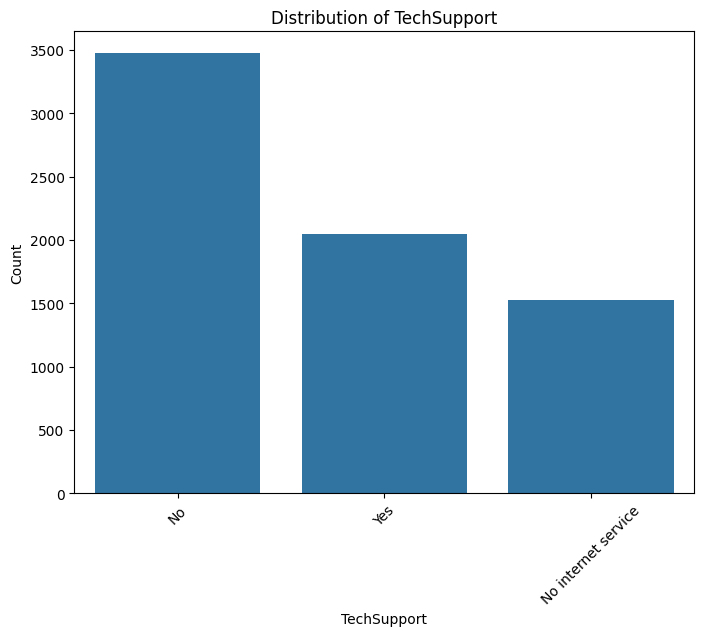

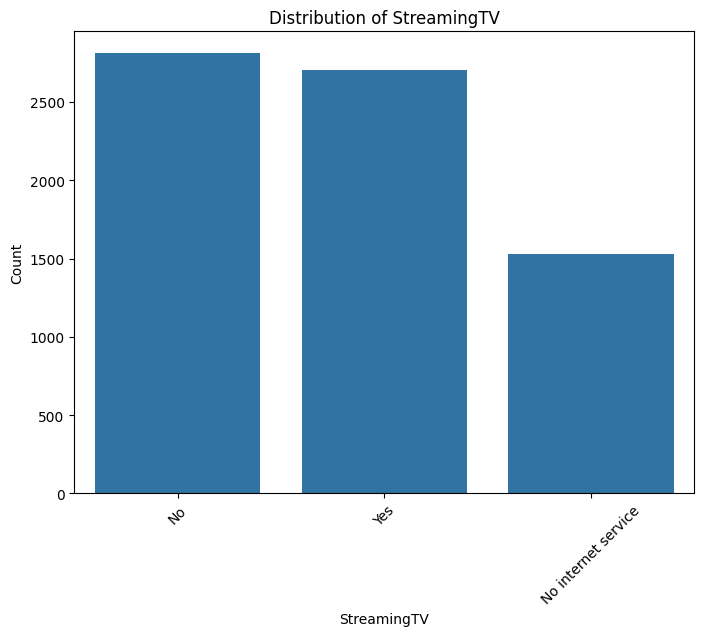

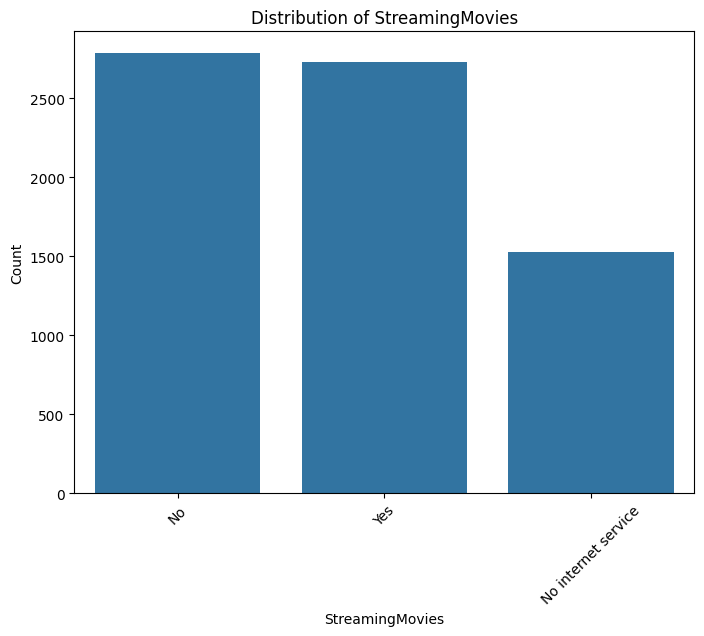

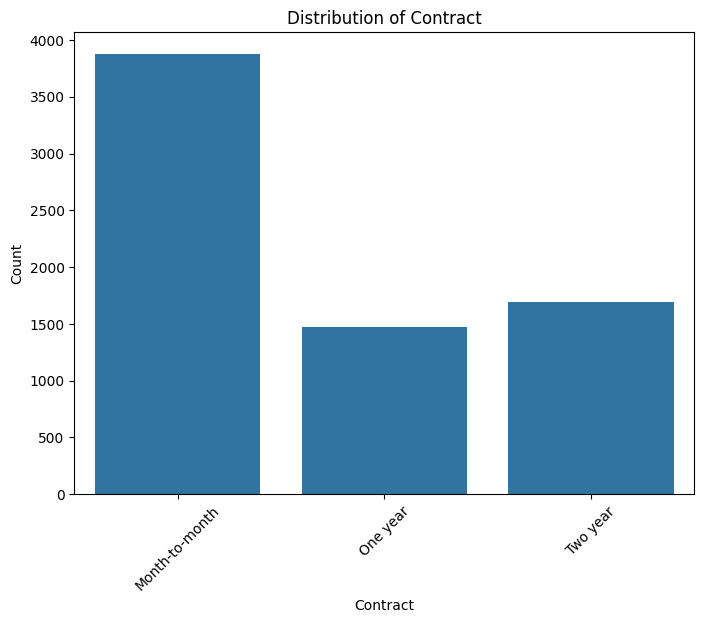

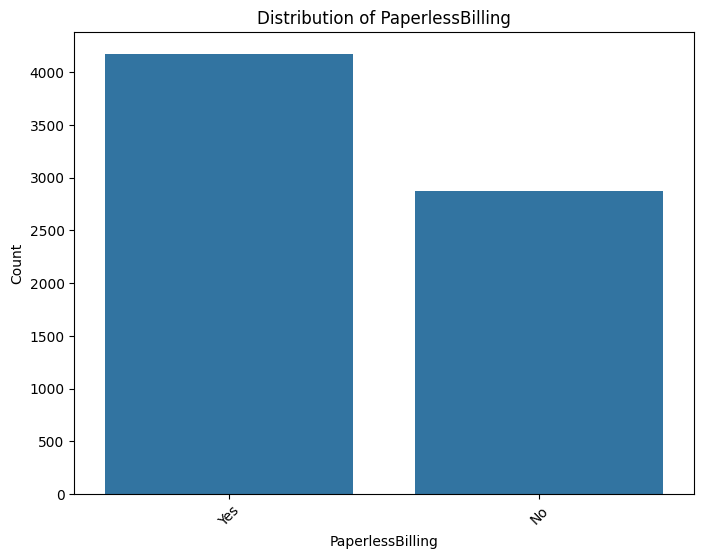

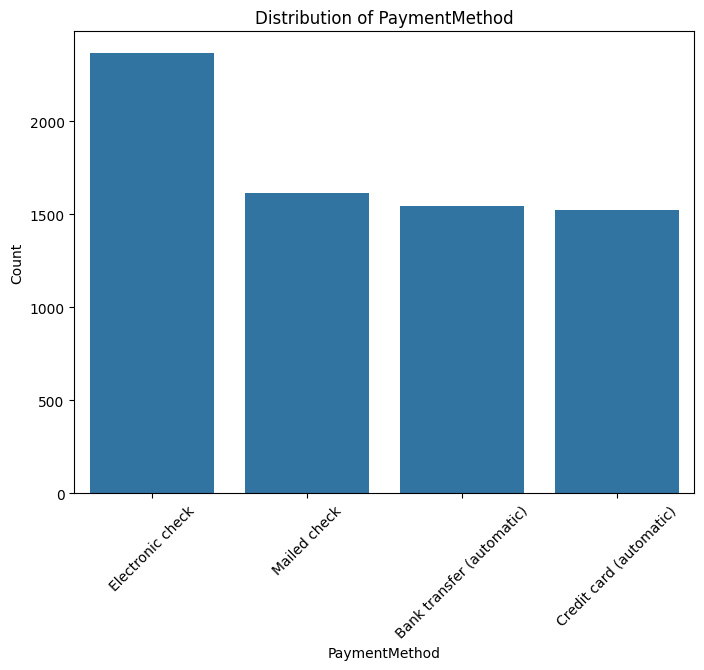

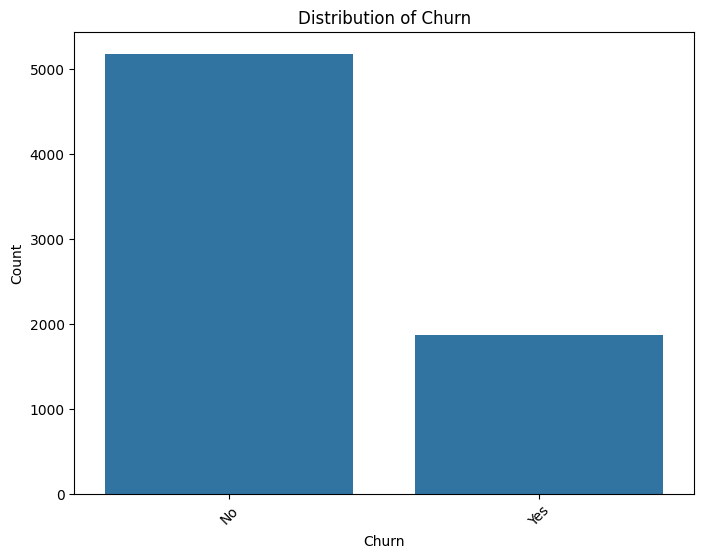

In [15]:
# Box plot visualization
import matplotlib.pyplot as plt
import seaborn as sns
# numerical_columns = [col for col, dtype in column_types if dtype == 'double' or dtype == 'int']
# categorical_columns = [col for col, dtype in column_types if dtype == "string"]

for feature in numerical_columns:
    plt.figure()
    plt.hist(df_pyspark.select(feature).toPandas()[feature], bins=10)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Distribution of {feature}")
    plt.show()

for feature in numerical_columns:
    # Convert column to Pandas DataFrame for visualization
    col_data = df_pyspark.select(feature).toPandas()
    # Plot box plot
    plt.figure(figsize=(6,4))
    sns.boxplot(data=col_data, orient='h')
    plt.title(f'Box Plot of {feature}')
    plt.show()

# Convert the DataFrame to Pandas for visualization
df_pandas = df_pyspark.select(*categorical_columns).toPandas()

# Create bar charts for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df_pandas)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [16]:
# Identify total number of rows
unique = df.select('customerID').distinct().count()
unique

7043

In [17]:
# Dropping customerID column
df_pyspark = df.drop('customerID')
df_pyspark.show()


+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|

In [18]:
from pyspark.sql.functions import col, sum

# Check for null values in the DataFrame
null_counts = df_pyspark.select([sum(col(c).isNull().cast("int")).alias(c) for c in df_pyspark.columns])

# Display the counts of null values for each column
print("Counts of null values in each column:")
null_counts.show()

# Calculate the total count of null values
total_null_counts = null_counts.agg(*[sum(col(c)).alias(c) for c in null_counts.columns])

# Display the total count of null values
print("Total count of null values in the DataFrame:")
total_null_counts.show()


Counts of null values in each column:
+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|     0|            0|      0|         0|     0|           0|            0|              0|             0|           0|               0|          0|          0|              0|       0|               0|       

In [19]:
from pyspark.sql import SparkSession

# Filter out rows where any column is not null
filtered_df = df_pyspark.na.drop()

# Show the filtered DataFrame
filtered_df.show()


+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|Female|            0|    Yes|        No|     1|          No|No phone service|            DSL|

In [20]:
from pyspark.sql.functions import col, sum

# Check for null values in the DataFrame
null_counts = filtered_df.select([sum(col(c).isNull().cast("int")).alias(c) for c in filtered_df.columns])

# Display the counts of null values for each column
print("Counts of null values in each column:")
null_counts.show()

# Calculate the total count of null values
total_null_counts = null_counts.agg(*[sum(col(c)).alias(c) for c in null_counts.columns])

# Display the total count of null values
print("Total count of null values in the DataFrame:")
total_null_counts.show()


Counts of null values in each column:
+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|     0|            0|      0|         0|     0|           0|            0|              0|             0|           0|               0|          0|          0|              0|       0|               0|       

In [21]:
# Filtered schema
filtered_df.dtypes

[('gender', 'string'),
 ('SeniorCitizen', 'string'),
 ('Partner', 'string'),
 ('Dependents', 'string'),
 ('tenure', 'int'),
 ('PhoneService', 'string'),
 ('MultipleLines', 'string'),
 ('InternetService', 'string'),
 ('OnlineSecurity', 'string'),
 ('OnlineBackup', 'string'),
 ('DeviceProtection', 'string'),
 ('TechSupport', 'string'),
 ('StreamingTV', 'string'),
 ('StreamingMovies', 'string'),
 ('Contract', 'string'),
 ('PaperlessBilling', 'string'),
 ('PaymentMethod', 'string'),
 ('MonthlyCharges', 'double'),
 ('TotalCharges', 'double'),
 ('Churn', 'string')]

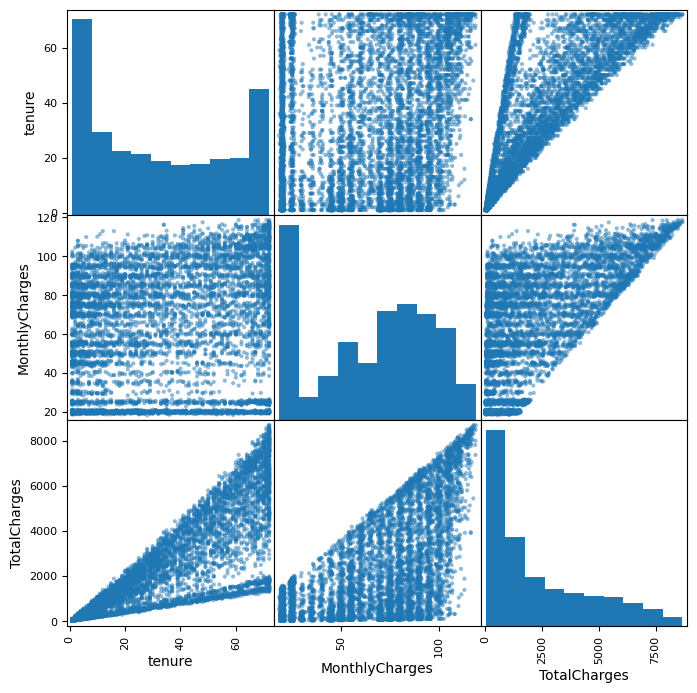

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your Spark DataFrame
pandas_df = filtered_df.toPandas()

# Plot scatter matrix
pd.plotting.scatter_matrix(pandas_df, figsize=(8, 8))
plt.show()


In [23]:
from pyspark.sql.functions import corr
#plotting the correlation matrix
correlation_matrix = []
for col1 in numerical_columns:
    for col2 in numerical_columns:
        if col1 != col2:  # Skip calculating correlation of a column with itself
            correlation_value = filtered_df.select(corr(col1, col2)).collect()[0][0]
            correlation_matrix.append((col1, col2, correlation_value))

# Display the correlation matrix
print("Correlation Matrix:")
for correlation in correlation_matrix:
    print(correlation)



Correlation Matrix:
('tenure', 'MonthlyCharges', 0.24686176664089363)
('tenure', 'TotalCharges', 0.8258804609332019)
('MonthlyCharges', 'tenure', 0.24686176664089363)
('MonthlyCharges', 'TotalCharges', 0.6510648032262017)
('TotalCharges', 'tenure', 0.8258804609332017)
('TotalCharges', 'MonthlyCharges', 0.651064803226202)


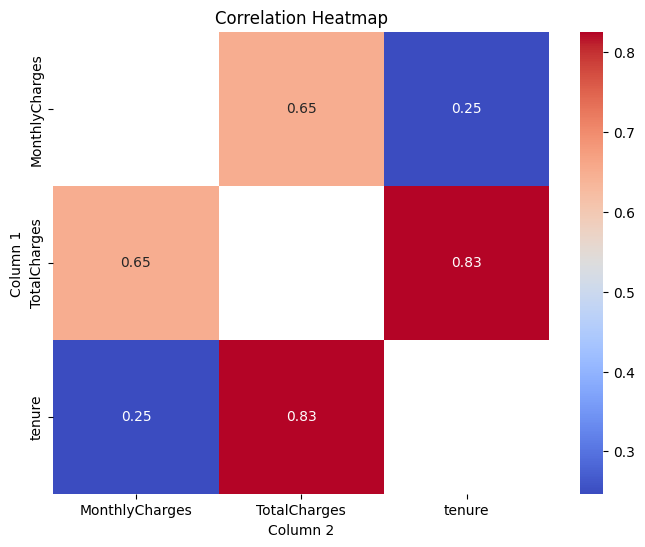

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the correlation matrix to a DataFrame
corr_df = pd.DataFrame(correlation_matrix, columns=["Column 1", "Column 2", "Correlation"])

# Pivot the DataFrame to create a correlation matrix
corr_matrix = corr_df.pivot(index="Column 1", columns="Column 2", values="Correlation")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [25]:
from pyspark.ml.stat import ChiSquareTest
from pyspark.ml.feature import StringIndexer

# Assuming column_types is a DataFrame with columns 'column_name' and 'data_type'
# Filter the DataFrame to get only string columns
column_types = filtered_df.dtypes
inputColumns = [col_name for col_name, col_type in column_types if col_type == 'string']

# Initialize DataFrame
indexed = filtered_df

# Loop through each string column and index it
for col in inputColumns:
    string_indexer = StringIndexer(inputCol=col, outputCol=col+'_indexed', handleInvalid="keep")
    indexed = string_indexer.fit(indexed).transform(indexed)

# Drop the original string columns
columns_to_drop = inputColumns + numerical_columns
indexed = indexed.drop(*columns_to_drop)


# Show the resulting DataFrame
indexed.show()

+--------------+---------------------+---------------+------------------+--------------------+---------------------+-----------------------+----------------------+--------------------+------------------------+-------------------+-------------------+-----------------------+----------------+------------------------+---------------------+-------------+
|gender_indexed|SeniorCitizen_indexed|Partner_indexed|Dependents_indexed|PhoneService_indexed|MultipleLines_indexed|InternetService_indexed|OnlineSecurity_indexed|OnlineBackup_indexed|DeviceProtection_indexed|TechSupport_indexed|StreamingTV_indexed|StreamingMovies_indexed|Contract_indexed|PaperlessBilling_indexed|PaymentMethod_indexed|Churn_indexed|
+--------------+---------------------+---------------+------------------+--------------------+---------------------+-----------------------+----------------------+--------------------+------------------------+-------------------+-------------------+-----------------------+----------------+------

In [26]:
from itertools import combinations
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import ChiSquareTest

columns = [col for col in indexed.columns if col not in ['Churn_indexed']]

assembled = VectorAssembler(inputCols=columns, outputCol="features")
assembled_data = assembled.transform(indexed)
assembled_data = assembled_data.drop(*columns)
assembled_data.show()
# Perform chi-square test
chi_test_result = ChiSquareTest.test(assembled_data, "features", "Churn_indexed")
chi_test_result.show()

+-------------+--------------------+
|Churn_indexed|            features|
+-------------+--------------------+
|          0.0|(16,[0,2,4,5,6,8]...|
|          0.0|(16,[6,7,9,13,14,...|
|          1.0|(16,[6,7,8,15],[1...|
|          0.0|(16,[4,5,6,7,9,10...|
|          1.0|      (16,[0],[1.0])|
|          1.0|(16,[0,5,9,11,12]...|
|          0.0|(16,[3,5,8,11,15]...|
|          0.0|(16,[0,4,5,6,7,14...|
|          1.0|(16,[0,2,5,9,10,1...|
|          0.0|(16,[3,6,7,8,13,1...|
|          0.0|(16,[2,3,6,7,15],...|
|          0.0|[0.0,0.0,0.0,0.0,...|
|          0.0|(16,[2,5,9,11,12,...|
|          1.0|(16,[5,8,9,11,12,...|
|          0.0|(16,[7,9,10,11,12...|
|          0.0|[1.0,0.0,1.0,1.0,...|
|          0.0|[1.0,0.0,0.0,0.0,...|
|          0.0|(16,[3,5,7,9,11,1...|
|          1.0|(16,[0,2,3,6,9,10...|
|          0.0|(16,[0,8,9,12],[1...|
+-------------+--------------------+
only showing top 20 rows

+--------------------+--------------------+--------------------+
|             pValues

In [27]:
# Assuming chi_test_result is the result of the chi-square test and assembled_data is the DataFrame with feature vectors
from pyspark.ml.stat import ChiSquareTest
from pyspark.sql import functions as F

# Get the feature names
feature_n = assembled_data.schema["features"].metadata["ml_attr"]["attrs"]["nominal"]

# Extract p-values from the chi-square test result
p_values = chi_test_result.select("pValues").collect()[0][0]

# Set the significance level
significance_level = 0.05

# Initialize lists to store significant and non-significant features
significant_features = []
non_significant_features = []

# Iterate through each feature and its corresponding p-value
for feature, p_value in zip(feature_n, p_values):
    if p_value < significance_level:
        significant_features.append(feature)
    else:
        non_significant_features.append(feature)

# Print significant and non-significant features
print("Significant Features:")
for feature in significant_features:
    print(feature)

print("\nNon-Significant Features:")
for feature in non_significant_features:
    print(feature)

# Additional investigation or visualization steps can be added here


Significant Features:
{'vals': ['0', '1', '__unknown'], 'idx': 1, 'name': 'SeniorCitizen_indexed'}
{'vals': ['No', 'Yes', '__unknown'], 'idx': 2, 'name': 'Partner_indexed'}
{'vals': ['No', 'Yes', '__unknown'], 'idx': 3, 'name': 'Dependents_indexed'}
{'vals': ['No', 'Yes', 'No phone service', '__unknown'], 'idx': 5, 'name': 'MultipleLines_indexed'}
{'vals': ['Fiber optic', 'DSL', 'No', '__unknown'], 'idx': 6, 'name': 'InternetService_indexed'}
{'vals': ['No', 'Yes', 'No internet service', '__unknown'], 'idx': 7, 'name': 'OnlineSecurity_indexed'}
{'vals': ['No', 'Yes', 'No internet service', '__unknown'], 'idx': 8, 'name': 'OnlineBackup_indexed'}
{'vals': ['No', 'Yes', 'No internet service', '__unknown'], 'idx': 9, 'name': 'DeviceProtection_indexed'}
{'vals': ['No', 'Yes', 'No internet service', '__unknown'], 'idx': 10, 'name': 'TechSupport_indexed'}
{'vals': ['No', 'Yes', 'No internet service', '__unknown'], 'idx': 11, 'name': 'StreamingTV_indexed'}
{'vals': ['No', 'Yes', 'No internet s

In [28]:
from pyspark.sql import functions as F

# Group by 'gender' and 'PhoneService', then count the number of records in each group
gender_phone_counts = filtered_df.groupBy('gender', 'PhoneService').count()

# Display the counts
gender_phone_counts.show()


+------+------------+-----+
|gender|PhoneService|count|
+------+------------+-----+
|  Male|          No|  351|
|  Male|         Yes| 3198|
|Female|          No|  329|
|Female|         Yes| 3154|
+------+------------+-----+



+-----+------------------+
|Churn|avg(TotalCharges) |
+-----+------------------+
|No   |2555.3441410032997|
|Yes  |1531.7960941680035|
+-----+------------------+



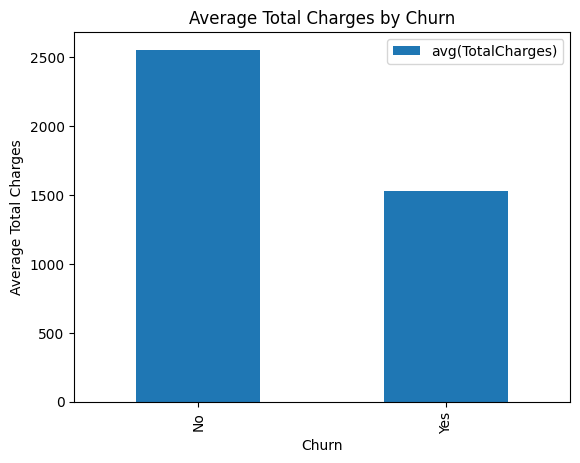

In [29]:
import matplotlib.pyplot as plt
# Create a bar plot of total charges for each churn value
df_pyspark.groupby('Churn').agg(F.mean('TotalCharges')).show(truncate=False)
df_pyspark.groupby('Churn').agg(F.mean('TotalCharges')).toPandas().plot(x='Churn', y='avg(TotalCharges)', kind='bar')
plt.title('Average Total Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Total Charges')
plt.show()


+-----+-------------------+
|Churn|avg(MonthlyCharges)|
+-----+-------------------+
|No   |61.2651236953999   |
|Yes  |74.4413322632423   |
+-----+-------------------+



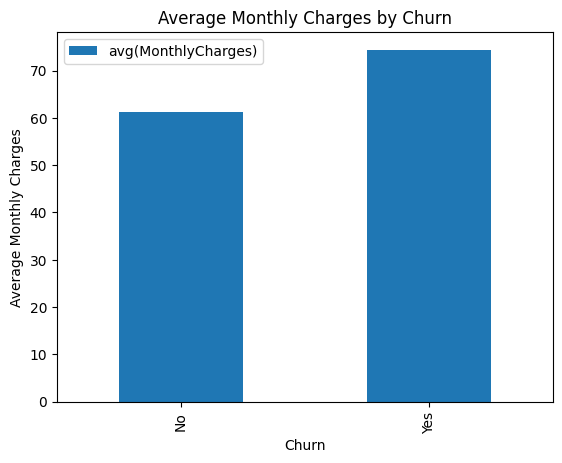

In [30]:
import matplotlib.pyplot as plt
# Create a bar plot of total charges for each churn value
df_pyspark.groupby('Churn').agg(F.mean('MonthlyCharges')).show(truncate=False)
df_pyspark.groupby('Churn').agg(F.mean('MonthlyCharges')).toPandas().plot(x='Churn', y='avg(MonthlyCharges)', kind='bar')
plt.title('Average Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Average Monthly Charges')
plt.show()


In [31]:

new_df = filtered_df.drop('TotalCharges','PhoneService','tenure')
# Show the updated DataFrame
new_df.show()

+------+-------------+-------+----------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+-----+
|gender|SeniorCitizen|Partner|Dependents|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|Churn|
+------+-------------+-------+----------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+-----+
|Female|            0|    Yes|        No|No phone service|            DSL|                 No|                Yes|                 No|                 No|                 No|                 No

In [33]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import MinMaxScaler

columns_df = new_df.dtypes
numerical_columns_filtered = [col_name for col_name, col_type in columns_df if col_type in ['bigint', 'int', 'float', 'double']]
# Assemble numerical features into a single vector column
assembler1 = VectorAssembler(inputCols=numerical_columns_filtered, outputCol="features")
assembled_df1 = assembler1.transform(new_df)

# Initialize the StandardScaler
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

# Fit the transform StandardScaler to the data
scaled_df = scaler.fit(assembled_df1).transform(assembled_df1)

# Show the scaled features
scaled_df = scaled_df.drop(*numerical_columns_filtered)
scaled_df = scaled_df.drop('features')
scaled_df.show()


+------+-------------+-------+----------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+-----+--------------------+
|gender|SeniorCitizen|Partner|Dependents|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|Churn|     scaled_features|
+------+-------------+-------+----------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+-----+--------------------+
|Female|            0|    Yes|        No|No phone service|            DSL|                 No|                Yes|                 No|                 No|                 No| 

In [34]:
from pyspark.ml.feature import StringIndexer

# Assuming column_types is a DataFrame with columns 'column_name' and 'data_type'
# Filter the DataFrame to get only string columns
column_types = scaled_df.dtypes
inputColumns = [col_name for col_name, col_type in column_types if col_type == 'string']

# Initialize DataFrame
indexed_df = scaled_df

# Loop through each string column and index it
for col in inputColumns:
    string_indexer = StringIndexer(inputCol=col, outputCol=col+'_indexed', handleInvalid="keep")
    indexed_df = string_indexer.fit(indexed_df).transform(indexed_df)

# Drop the original string columns
indexed_df = indexed_df.drop(*inputColumns)

# Show the resulting DataFrame
indexed_df.show()


+--------------------+--------------+---------------------+---------------+------------------+---------------------+-----------------------+----------------------+--------------------+------------------------+-------------------+-------------------+-----------------------+----------------+------------------------+---------------------+-------------+
|     scaled_features|gender_indexed|SeniorCitizen_indexed|Partner_indexed|Dependents_indexed|MultipleLines_indexed|InternetService_indexed|OnlineSecurity_indexed|OnlineBackup_indexed|DeviceProtection_indexed|TechSupport_indexed|StreamingTV_indexed|StreamingMovies_indexed|Contract_indexed|PaperlessBilling_indexed|PaymentMethod_indexed|Churn_indexed|
+--------------------+--------------+---------------------+---------------+------------------+---------------------+-----------------------+----------------------+--------------------+------------------------+-------------------+-------------------+-----------------------+----------------+------

In [35]:
from pyspark.ml.feature import OneHotEncoder

# Filter the DataFrame to get only columns that end with '_indexed' and are not 'churn_indexed'
indexed_mode_columns = [col_name for col_name in indexed_df.columns if col_name.endswith('_indexed') and col_name != 'Churn_indexed']

# Initialize DataFrame
encoded_df = indexed_df

# Loop through each indexed column and apply OneHotEncoder
for col in indexed_mode_columns:
    encoded_columns = OneHotEncoder(inputCol=col, outputCol=col+'_encoded')
    encoded_df = encoded_columns.fit(encoded_df).transform(encoded_df)

# Drop the original indexed columns
encoded_df = encoded_df.drop(*indexed_mode_columns)

# Show the resulting DataFrame
encoded_df.show()


+--------------------+-------------+----------------------+-----------------------------+-----------------------+--------------------------+-----------------------------+-------------------------------+------------------------------+----------------------------+--------------------------------+---------------------------+---------------------------+-------------------------------+------------------------+--------------------------------+-----------------------------+
|     scaled_features|Churn_indexed|gender_indexed_encoded|SeniorCitizen_indexed_encoded|Partner_indexed_encoded|Dependents_indexed_encoded|MultipleLines_indexed_encoded|InternetService_indexed_encoded|OnlineSecurity_indexed_encoded|OnlineBackup_indexed_encoded|DeviceProtection_indexed_encoded|TechSupport_indexed_encoded|StreamingTV_indexed_encoded|StreamingMovies_indexed_encoded|Contract_indexed_encoded|PaperlessBilling_indexed_encoded|PaymentMethod_indexed_encoded|
+--------------------+-------------+--------------------

In [36]:
from pyspark.ml.feature import VectorAssembler
# Applying vector assembler
feature_columns = [col for col in encoded_df.columns if col not in ['Churn_indexed']]

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
assembled_df = assembler.transform(encoded_df)

assembled_df = assembled_df.drop(*feature_columns)
assembled_df.show()


+-------------+--------------------+
|Churn_indexed|            features|
+-------------+--------------------+
|          0.0|(42,[0,2,3,6,7,11...|
|          0.0|(42,[0,1,3,5,7,9,...|
|          1.0|(42,[0,1,3,5,7,9,...|
|          0.0|(42,[0,1,3,5,7,11...|
|          1.0|(42,[0,2,3,5,7,9,...|
|          1.0|(42,[0,2,3,5,7,10...|
|          0.0|(42,[0,1,3,5,8,10...|
|          0.0|(42,[0,2,3,5,7,11...|
|          1.0|(42,[0,2,3,6,7,10...|
|          0.0|(42,[0,1,3,5,8,9,...|
|          0.0|(42,[0,1,3,6,8,9,...|
|          0.0|(42,[0,1,3,5,7,9,...|
|          0.0|(42,[0,1,3,6,7,10...|
|          1.0|(42,[0,1,3,5,7,10...|
|          0.0|(42,[0,1,3,5,7,9,...|
|          0.0|(42,[0,2,3,6,8,10...|
|          0.0|(42,[0,2,3,5,7,9,...|
|          0.0|(42,[0,1,3,5,8,10...|
|          1.0|(42,[0,2,3,6,8,9,...|
|          0.0|(42,[0,2,3,5,7,9,...|
+-------------+--------------------+
only showing top 20 rows



In [38]:
# split dataset into 80 20
final_df = assembled_df
train_data, test_data = final_df.randomSplit([0.8, 0.2], seed=100)
# split dataset into 80 20 for validation and testing
train, validation_data = train_data.randomSplit([0.8, 0.2], seed=100)

In [39]:
print(train.count())
print(validation_data.count())
print(test_data.count())

4502
1127
1403


In [40]:
# apply random forest and test it on the validation set

from pyspark.ml.classification import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="Churn_indexed")

# Train the model on the training data
model = rf.fit(train)

# Make predictions on the validation data
predictions = model.transform(validation_data)

# Evaluate the model on the validation data
accuracy = predictions.filter(predictions.Churn_indexed == predictions.prediction).count() / predictions.count()

# Print the accuracy
print(f"Accuracy on validation data: {accuracy}")


Accuracy on validation data: 0.7604259094942325


In [44]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define the evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Churn_indexed", predictionCol="prediction")

# Calculate accuracy
accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})

# Calculate precision
precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})

# Calculate recall
recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})

# Calculate F1-score
f1_score = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

# Print the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")


Accuracy: 0.7604259094942325
Precision: 0.745274888092926
Recall: 0.7604259094942325
F1-Score: 0.7342077158178193


In [49]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Define a BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="Churn_indexed", rawPredictionCol="prediction")

# Evaluate the model and get the ROC AUC
auc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
print(f"AUC: {auc}")


AUC: 0.6405338990811685


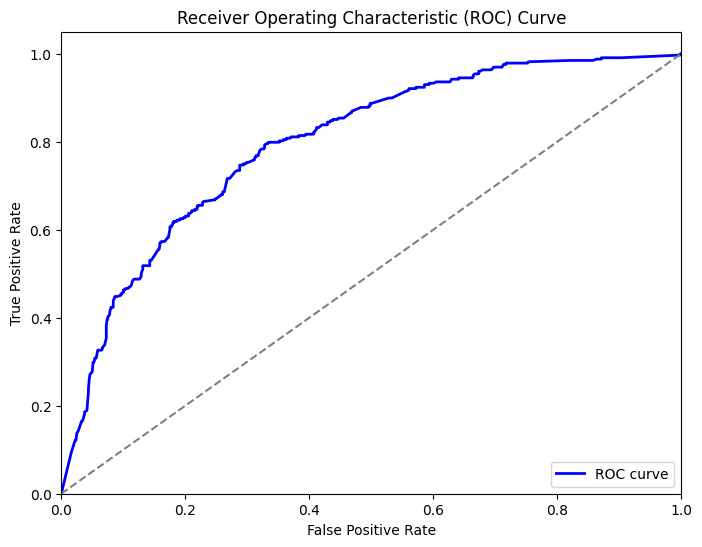

In [51]:
from sklearn.metrics import roc_curve

# Collect probabilities and labels
probs = predictions.select('probability').rdd.map(lambda x: x[0][1]).collect()
labels = predictions.select('Churn_indexed').rdd.map(lambda x: x[0]).collect()

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(labels, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [57]:
# Create a Random Forest classifier
rf_optimized = RandomForestClassifier(featuresCol="features", labelCol="Churn_indexed", numTrees=100, maxDepth=5)

# Train the model on the training data
model_optimized = rf_optimized.fit(train)

# Make predictions on the validation data
predictions_optimized = model_optimized.transform(validation_data)

# Evaluate the model on the validation data
accuracy_optimized = predictions_optimized.filter(
    predictions_optimized.Churn_indexed == predictions_optimized.prediction).count() / predictions_optimized.count()

# Print the accuracy
print(f"Accuracy on validation data: {accuracy_optimized}")

Accuracy on validation data: 0.771960958296362


In [58]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define the evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Churn_indexed", predictionCol="prediction")

# Calculate accuracy
accuracy = evaluator.evaluate(predictions_optimized, {evaluator.metricName: "accuracy"})

# Calculate precision
precision = evaluator.evaluate(predictions_optimized, {evaluator.metricName: "weightedPrecision"})

# Calculate recall
recall = evaluator.evaluate(predictions_optimized, {evaluator.metricName: "weightedRecall"})

# Calculate F1-score
f1_score = evaluator.evaluate(predictions_optimized, {evaluator.metricName: "f1"})

# Print the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")


Accuracy: 0.771960958296362
Precision: 0.759238128368747
Recall: 0.771960958296362
F1-Score: 0.7512986273205159


In [62]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Define a BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="Churn_indexed", rawPredictionCol="prediction")

# Evaluate the model and get the ROC AUC
auc = evaluator.evaluate(predictions_optimized, {evaluator.metricName: "areaUnderROC"})
print(f"AUC: {auc}")


AUC: 0.6630467963002533


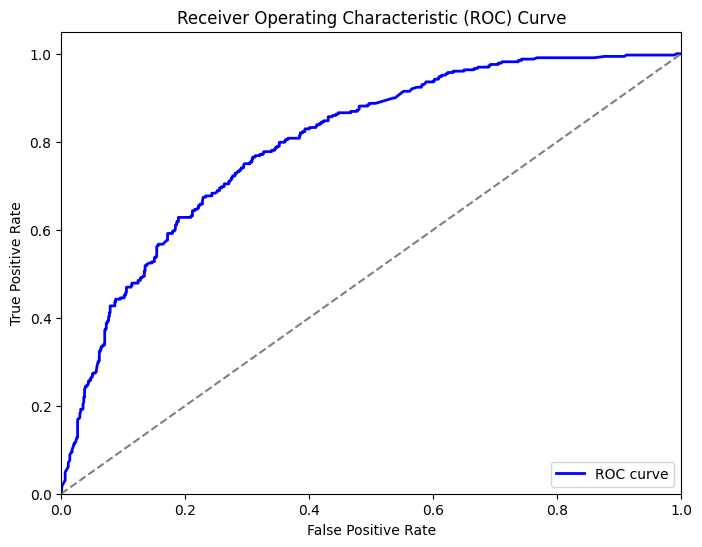

In [63]:
from sklearn.metrics import roc_curve

# Collect probabilities and labels
probs = predictions_optimized.select('probability').rdd.map(lambda x: x[0][1]).collect()
labels = predictions_optimized.select('Churn_indexed').rdd.map(lambda x: x[0]).collect()

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(labels, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [42]:
# Check if the label column exists in the DataFrame
train_data.printSchema()
train.printSchema()
validation_data.printSchema()


root
 |-- Churn_indexed: double (nullable = false)
 |-- features: vector (nullable = true)

root
 |-- Churn_indexed: double (nullable = false)
 |-- features: vector (nullable = true)

root
 |-- Churn_indexed: double (nullable = false)
 |-- features: vector (nullable = true)



In [64]:
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier

# Define the Random Forest classifier
rf_optimized2 = RandomForestClassifier(featuresCol="features", labelCol="Churn_indexed")

# Define the pipeline
pipeline = Pipeline(stages=[rf_optimized2])

trees_range = list(range(90,105))
depth_range = list(range(1,10))

# Define the parameter grid
paramGrid = (ParamGridBuilder()
             .addGrid(rf_optimized2.numTrees, trees_range)
             .addGrid(rf_optimized2.maxDepth, depth_range)
             .build())

# Define the evaluator
evaluator = BinaryClassificationEvaluator(labelCol="Churn_indexed", rawPredictionCol="prediction",metricName='areaUnderROC')

# Define the cross-validator
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)

# Fit the model
cvModel = crossval.fit(train)


accuracy = evaluator.evaluate(cvModel.transform(validation_data))
print(f"Accuracy on validation data: {accuracy}")


KeyboardInterrupt: 

In [52]:
# code of pyspark  that  prints unique values  in each column of the filtered dataframe and also print list of unique value in columns

# Get the unique values for each column in the filtered DataFrame
unique_values_dict = {}
for column in filtered_df.columns:
  unique_values_dict[column] = filtered_df.select(column).distinct().collect()

# Print the number of unique values in each column
print("Number of unique values in each column:")
for column, unique_values in unique_values_dict.items():
  print(f"{column}: {len(unique_values)}")

# Print the list of unique values in each column
print("\nList of unique values in each column:")
for column, unique_values in unique_values_dict.items():
  print(f"{column}: {unique_values}")


Number of unique values in each column:
gender: 2
SeniorCitizen: 2
Partner: 2
Dependents: 2
tenure: 72
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
MonthlyCharges: 1584
TotalCharges: 6530
Churn: 2

List of unique values in each column:
gender: [Row(gender='Female'), Row(gender='Male')]
SeniorCitizen: [Row(SeniorCitizen='0'), Row(SeniorCitizen='1')]
Partner: [Row(Partner='No'), Row(Partner='Yes')]
Dependents: [Row(Dependents='No'), Row(Dependents='Yes')]
tenure: [Row(tenure=31), Row(tenure=65), Row(tenure=53), Row(tenure=34), Row(tenure=28), Row(tenure=27), Row(tenure=26), Row(tenure=44), Row(tenure=12), Row(tenure=22), Row(tenure=47), Row(tenure=1), Row(tenure=52), Row(tenure=13), Row(tenure=16), Row(tenure=6), Row(tenure=3), Row(tenure=20), Row(tenure=40), Row(tenure=57), Row(tenure=54), Row(tenure=48), Row(tenure=5), Row(tenure

In [59]:
# Create a Random Forest classifier
rf_test = RandomForestClassifier(featuresCol="features", labelCol="Churn_indexed", numTrees=100, maxDepth=5)

# Train the model on the training data
model_test = rf_test.fit(train)

# Make predictions on the testing data
predictions_test = model_test.transform(test_data)

# Evaluate the model on the testing data
accuracy_test = predictions_test.filter(
    predictions_test.Churn_indexed == predictions_test.prediction).count() / predictions_test.count()

# Print the accuracy
print(f"Accuracy on test data: {accuracy_test}")

Accuracy on test data: 0.7683535281539559


In [61]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define the evaluator
evaluator = MulticlassClassificationEvaluator(labelCol="Churn_indexed", predictionCol="prediction")

# Calculate accuracy
accuracy = evaluator.evaluate(predictions_test, {evaluator.metricName: "accuracy"})

# Calculate precision
precision = evaluator.evaluate(predictions_test, {evaluator.metricName: "weightedPrecision"})

# Calculate recall
recall = evaluator.evaluate(predictions_test, {evaluator.metricName: "weightedRecall"})

# Calculate F1-score
f1_score = evaluator.evaluate(predictions_test, {evaluator.metricName: "f1"})

# Print the performance metrics
print("Performance metrics for test data")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")


Performance metrics for test data
Accuracy: 0.7683535281539559
Precision: 0.7505769868841622
Recall: 0.7683535281539559
F1-Score: 0.7453965186523875


**<h1><font color='teal'>Making model for the UNFILTERED DATASET</font>**


In [ ]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import MinMaxScaler

non_filtered_column_types = filtered_df.dtypes
non_filtered_numerical_columns = [col_name for col_name, col_type in non_filtered_column_types if col_type in ['bigint', 'int', 'float', 'double']]
# Assemble numerical features into a single vector column
non_filtered_assembler = VectorAssembler(inputCols=non_filtered_numerical_columns, outputCol="features")
non_filtered_assembled_df = non_filtered_assembler.transform(filtered_df)

# Initialize the StandardScaler
non_filtered_scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

# Fit the transform StandardScaler to the data
non_filtered_scaled_df = non_filtered_scaler.fit(non_filtered_assembled_df).transform(non_filtered_assembled_df)

# Show the scaled features
non_filtered_scaled_df = non_filtered_scaled_df.drop(*non_filtered_numerical_columns)
non_filtered_scaled_df = non_filtered_scaled_df.drop('features')
non_filtered_scaled_df.show()

+------+-------------+-------+----------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+-----+--------------------+
|gender|SeniorCitizen|Partner|Dependents|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|Churn|     scaled_features|
+------+-------------+-------+----------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+-----+--------------------+
|Female|            0|    Yes|        No|          No|No phone service|            DSL|                 No|                Yes|         

In [ ]:
from pyspark.ml.feature import StringIndexer

# Assuming column_types is a DataFrame with columns 'column_name' and 'data_type'
# Filter the DataFrame to get only string columns
non_filtered_column_types = non_filtered_scaled_df.dtypes
non_filtered_inputColumns = [col_name for col_name, col_type in non_filtered_column_types if col_type == 'string']

# Initialize DataFrame
non_filtered_indexed_df = non_filtered_scaled_df

# Loop through each string column and index it
for col in non_filtered_inputColumns:
    non_filtered_string_indexer = StringIndexer(inputCol=col, outputCol=col+'_indexed', handleInvalid="keep")
    non_filtered_indexed_df = non_filtered_string_indexer.fit(non_filtered_indexed_df).transform(non_filtered_indexed_df)

# Drop the original string columns
non_filtered_indexed_df = non_filtered_indexed_df.drop(*non_filtered_inputColumns)

# Show the resulting DataFrame
non_filtered_indexed_df.show()


+--------------------+--------------+---------------------+---------------+------------------+--------------------+---------------------+-----------------------+----------------------+--------------------+------------------------+-------------------+-------------------+-----------------------+----------------+------------------------+---------------------+-------------+
|     scaled_features|gender_indexed|SeniorCitizen_indexed|Partner_indexed|Dependents_indexed|PhoneService_indexed|MultipleLines_indexed|InternetService_indexed|OnlineSecurity_indexed|OnlineBackup_indexed|DeviceProtection_indexed|TechSupport_indexed|StreamingTV_indexed|StreamingMovies_indexed|Contract_indexed|PaperlessBilling_indexed|PaymentMethod_indexed|Churn_indexed|
+--------------------+--------------+---------------------+---------------+------------------+--------------------+---------------------+-----------------------+----------------------+--------------------+------------------------+-------------------+----

In [ ]:
from pyspark.ml.feature import OneHotEncoder

# Filter the DataFrame to get only columns that end with '_indexed' and are not 'churn_indexed'
non_filtered_indexed_mode_columns = [col_name for col_name in non_filtered_indexed_df.columns if col_name.endswith('_indexed') and col_name != 'Churn_indexed']

# Initialize DataFrame
non_filtered_encoded_df = non_filtered_indexed_df

# Loop through each indexed column and apply OneHotEncoder
for col in non_filtered_indexed_mode_columns:
    non_filtered_encoded_columns = OneHotEncoder(inputCol=col, outputCol=col+'_encoded')
    non_filtered_encoded_df = non_filtered_encoded_columns.fit(non_filtered_encoded_df).transform(non_filtered_encoded_df)

# Drop the original indexed columns
non_filtered_encoded_df = non_filtered_encoded_df.drop(*non_filtered_indexed_mode_columns)

# Show the resulting DataFrame
non_filtered_encoded_df.show()


+--------------------+-------------+----------------------+-----------------------------+-----------------------+--------------------------+----------------------------+-----------------------------+-------------------------------+------------------------------+----------------------------+--------------------------------+---------------------------+---------------------------+-------------------------------+------------------------+--------------------------------+-----------------------------+
|     scaled_features|Churn_indexed|gender_indexed_encoded|SeniorCitizen_indexed_encoded|Partner_indexed_encoded|Dependents_indexed_encoded|PhoneService_indexed_encoded|MultipleLines_indexed_encoded|InternetService_indexed_encoded|OnlineSecurity_indexed_encoded|OnlineBackup_indexed_encoded|DeviceProtection_indexed_encoded|TechSupport_indexed_encoded|StreamingTV_indexed_encoded|StreamingMovies_indexed_encoded|Contract_indexed_encoded|PaperlessBilling_indexed_encoded|PaymentMethod_indexed_encoded

In [ ]:
from pyspark.ml.feature import VectorAssembler
# 'encoded_df' is the DataFrame and to assemble all columns except 'RainToday_indexed_mode_encoded' and 'RainTomorrow_indexed_mode_encoded'
non_filtered_feature_columns = [col for col in non_filtered_encoded_df.columns if col not in ['Churn_indexed']]

non_filtered_assembler2 = VectorAssembler(inputCols=non_filtered_feature_columns, outputCol="features")
non_filtered_assembled_df2 = non_filtered_assembler2.transform(non_filtered_encoded_df)

non_filtered_assembled_df2 = non_filtered_assembled_df2.drop(*non_filtered_feature_columns)
non_filtered_assembled_df2.show()

+-------------+--------------------+
|Churn_indexed|            features|
+-------------+--------------------+
|          0.0|(46,[1,2,4,5,8,9,...|
|          0.0|(46,[0,1,2,3,5,7,...|
|          1.0|(46,[0,1,2,3,5,7,...|
|          0.0|(46,[0,1,2,3,5,7,...|
|          1.0|(46,[0,1,2,4,5,7,...|
|          1.0|(46,[0,1,2,4,5,7,...|
|          0.0|(46,[0,1,2,3,5,7,...|
|          0.0|(46,[0,1,2,4,5,7,...|
|          1.0|(46,[0,1,2,4,5,8,...|
|          0.0|(46,[0,1,2,3,5,7,...|
|          0.0|(46,[0,1,2,3,5,8,...|
|          0.0|(46,[0,1,2,3,5,7,...|
|          0.0|(46,[0,1,2,3,5,8,...|
|          1.0|(46,[0,1,2,3,5,7,...|
|          0.0|(46,[0,1,2,3,5,7,...|
|          0.0|(46,[0,1,2,4,5,8,...|
|          0.0|(46,[0,1,2,4,5,7,...|
|          0.0|(46,[0,1,2,3,5,7,...|
|          1.0|(46,[0,1,2,4,5,8,...|
|          0.0|(46,[0,1,2,4,5,7,...|
+-------------+--------------------+
only showing top 20 rows



In [ ]:
# prompt: split dataset into 80 20
non_filtered_final_df = non_filtered_assembled_df2
non_filtered_train_data, non_filtered_test_data = non_filtered_final_df.randomSplit([0.8, 0.2], seed=42)

non_filtered_train, non_filtered_validation_data = non_filtered_train_data.randomSplit([0.8, 0.2], seed=42)
print(non_filtered_train.count())
print(non_filtered_validation_data.count())
print(non_filtered_test_data.count())

4598
1092
1342


In [ ]:
# prompt: apply random forest and test it on validation set

from pyspark.ml.classification import RandomForestClassifier

# Create a Random Forest classifier
non_filtered_rf = RandomForestClassifier(featuresCol="features", labelCol="Churn_indexed", numTrees=150, maxDepth=5)

# Train the model on the training data
non_filtered_model = rf.fit(non_filtered_train)

# Make predictions on the validation data
non_filtered_predictions = model.transform(non_filtered_validation_data)

# Evaluate the model on the validation data
non_filtered_accuracy = non_filtered_predictions.filter(
    non_filtered_predictions.Churn_indexed == non_filtered_predictions.prediction).count() / non_filtered_predictions.count()

# Print the accuracy
print(f"Accuracy on validation data: {non_filtered_accuracy}")


Accuracy on validation data: 0.7115384615384616
